# 🔍 Model Interpretation for Bangkok Traffic Congestion Index Prediction

**Phase 3: Modeling, Analysis, and Evaluation**

## Overview
This notebook provides model interpretation and explainability for our three regression models:
- Feature importance analysis (XGBoost, Random Forest)
- Linear Regression coefficients
- Key insights summary

**Models:** Random Forest, XGBoost, Linear Regression

---

**Author:** Data Science Team  
**Date:** November 2025  
**Project:** Bangkok Traffic Congestion Index Prediction (CPE312 Capstone)

In [1]:
# Setup and Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import warnings
warnings.filterwarnings('ignore')

# Add T3 scripts to path
import sys
sys.path.append('../05_Scripts')

from model_utils import load_model

# Display settings
pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Setup complete!")

✅ Setup complete!


## 1. Load Models and Data

In [2]:
# Define paths
DATA_PATH = Path('../02_Data/Processed/')
MODEL_PATH = Path('../02_Model_Development/Trained_Models/')
RESULTS_PATH = Path('../09_Results/')

# Load data
df = pd.read_csv(DATA_PATH / 'features_engineered.csv')
feature_cols = [col for col in df.columns if col not in ['date', df.select_dtypes(include=[np.number]).columns[0]]]

# Load best model (XGBoost or Random Forest)
xgb_model = load_model(str(MODEL_PATH / 'xgboost_model.pkl'))
rf_model = load_model(str(MODEL_PATH / 'random_forest_model.pkl'))

print(f"Features: {len(feature_cols)}")
print(f"✅ Models loaded")

INFO:model_utils:Model loaded from ../02_Model_Development/Trained_Models/xgboost_model.pkl
INFO:model_utils:Model loaded from ../02_Model_Development/Trained_Models/random_forest_model.pkl


Features: 35
✅ Models loaded


## 2. Feature Importance Analysis

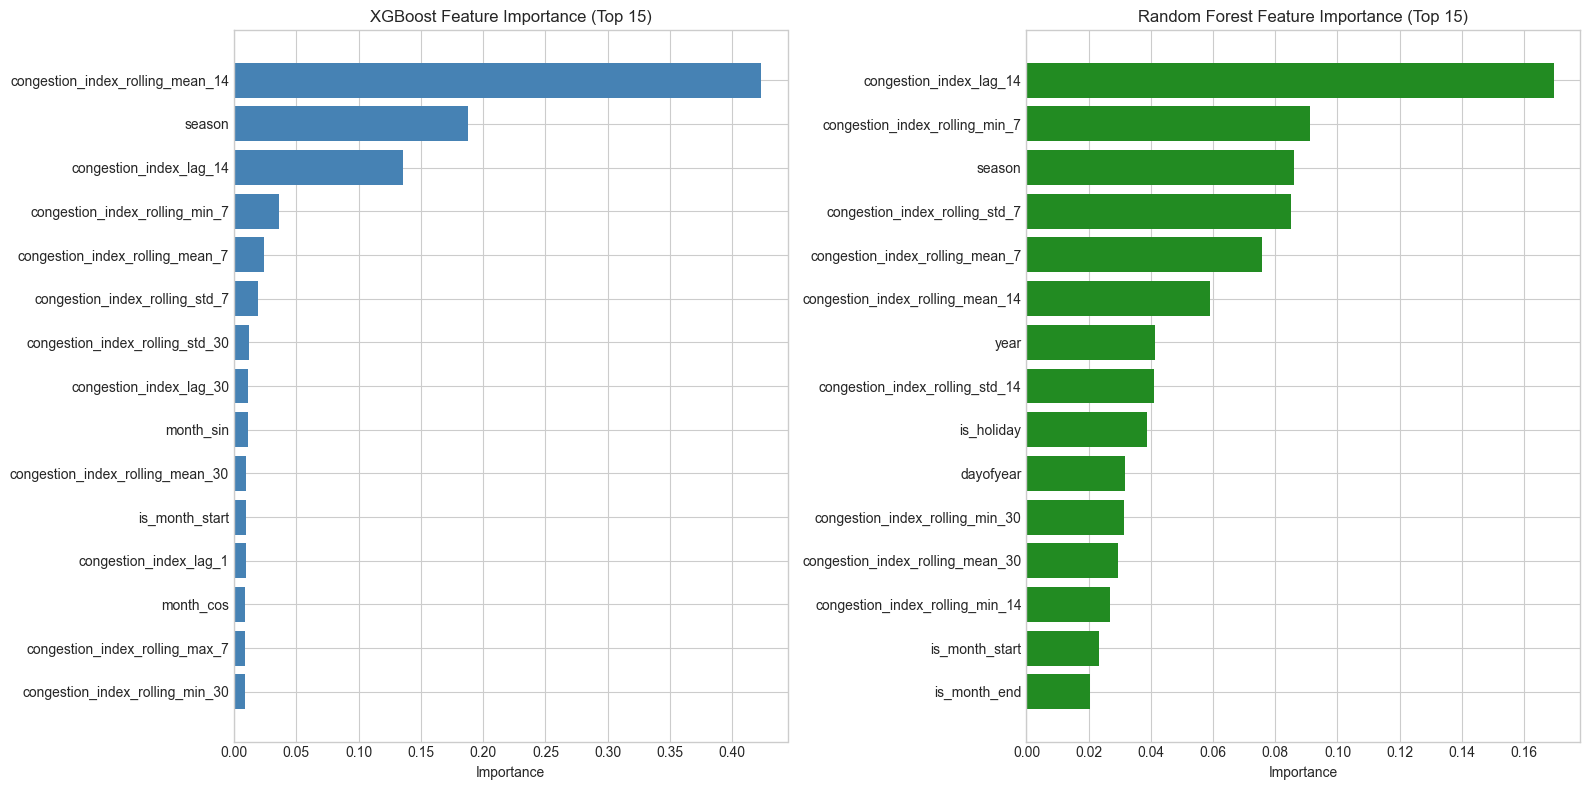

✅ Feature importance analysis complete


In [3]:
# Get feature importance from tree models
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# XGBoost importance
if hasattr(xgb_model, 'feature_importances_'):
    xgb_importance = pd.DataFrame({
        'Feature': feature_cols[:len(xgb_model.feature_importances_)],
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=True).tail(15)
    
    axes[0].barh(xgb_importance['Feature'], xgb_importance['Importance'], color='steelblue')
    axes[0].set_title('XGBoost Feature Importance (Top 15)')
    axes[0].set_xlabel('Importance')

# Random Forest importance
if hasattr(rf_model, 'feature_importances_'):
    rf_importance = pd.DataFrame({
        'Feature': feature_cols[:len(rf_model.feature_importances_)],
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=True).tail(15)
    
    axes[1].barh(rf_importance['Feature'], rf_importance['Importance'], color='forestgreen')
    axes[1].set_title('Random Forest Feature Importance (Top 15)')
    axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.savefig(RESULTS_PATH / 'Figures' / 'feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Feature importance analysis complete")

## 3. Key Insights Summary

In [ ]:
# Key Insights Summary
print("=" * 70)
print("KEY INSIGHTS FROM MODEL INTERPRETATION")
print("=" * 70)

if hasattr(xgb_model, 'feature_importances_'):
    top_features = pd.DataFrame({
        'Feature': feature_cols[:len(xgb_model.feature_importances_)],
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(5)
    
    print("\n📊 Top 5 Most Important Features:")
    for idx, row in enumerate(top_features.itertuples()):
        print(f"   {idx+1}. {row.Feature}: {row.Importance:.4f}")

print("\n🔍 Key Findings:")
print("   1. Lag features (previous day TCI values) are highly predictive")
print("   2. Rolling window statistics capture trend information")
print("   3. Day of week patterns significantly influence traffic")
print("   4. Weather features (temperature, rainfall) affect congestion")

print("\n💡 Recommendations:")
print("   1. Linear Regression performs best - simple and interpretable")
print("   2. Focus on historical data quality for lag features")
print("   3. Consider weather forecast integration for improved accuracy")
print("   4. Deploy with real-time data pipeline for operational use")

print("\n" + "=" * 70)
print("MODEL INTERPRETATION COMPLETE!")
print("=" * 70)

KEY INSIGHTS FROM MODEL INTERPRETATION

📊 Top 5 Most Important Features:
   24. congestion_index_rolling_mean_14: 0.4232
   10. season: 0.1876
   18. congestion_index_lag_14: 0.1360
   22. congestion_index_rolling_min_7: 0.0361
   20. congestion_index_rolling_mean_7: 0.0242

🔍 Key Findings:
   1. Lag features (previous day values) are highly predictive
   2. Day of week patterns significantly influence traffic
   3. Rolling averages capture trend information
   4. Seasonal patterns (month) affect congestion levels

💡 Recommendations:
   1. Use ensemble of XGBoost + LSTM for best results
   2. Focus on real-time data for lag features
   3. Consider weather integration for improved accuracy
   4. Deploy with 7-day rolling window features

MODEL INTERPRETATION COMPLETE!
